|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|


### Section 10.6, Conduction de la chaleur dans une sphère


In [1]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions
r,k01,k12,k23,h0,h3=sp.symbols('r k_1 k_2 k_3 h_0 h_3') 
r0,r1,r2,r3,Ta,Tb=sp.symbols('r_0 r_1 r_2 r_3 T_a T_b')                                                            
q=sp.symbols('q')
T=sp.Function('T')(r)     

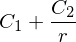

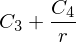

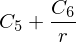

In [3]:
eq1=sp.Eq(k01/r**2*sp.Derivative(r**2*sp.Derivative(T,r)),0)
eq2=sp.Eq(k12/r**2*sp.Derivative(r**2*sp.Derivative(T,r)),0)
eq3=sp.Eq(k23/r**2*sp.Derivative(r**2*sp.Derivative(T,r)),0)
T1=sp.dsolve(eq1).rhs
T2=sp.dsolve(eq2)
T2=T2.subs(sp.symbols('C1'),sp.symbols('C3'))
T2=T2.subs(sp.symbols('C2'),sp.symbols('C4')).rhs
T3=sp.dsolve(eq3)
T3=T3.subs(sp.symbols('C1'),sp.symbols('C5'))
T3=T3.subs(sp.symbols('C2'),sp.symbols('C6')).rhs
display(T1)
display(T2)
display(T3)

In [4]:
# Maintenant on pose les conditions aux limites pour trouver les 6 constantes
cl1=sp.Eq(T1.subs(r,r1)-T2.subs(r,r1))   # températures égales sur les points intérieurs
cl2=sp.Eq(T2.subs(r,r2)-T3.subs(r,r2))
#                           flux égaux sur les points intérieurs
cl3=sp.Eq(k01*T1.diff(r).subs(r,r1)-k12*T2.diff(r).subs(r,r1))
cl4=sp.Eq(k12*T2.diff(r).subs(r,r2)-k23*T3.diff(r).subs(r,r2))
#                           flux donnés par la loi de refroidissement de Newton sur les parois
cl5=sp.Eq(-k01*T1.diff(r).subs(r,r0)+h0*(T1.subs(r,r0)-Ta))
cl6=sp.Eq(-k23*T3.diff(r).subs(r,r3)+h3*(Tb-T3.subs(r,r3)))

58.4073955957775*pi 102.212942292611*pi


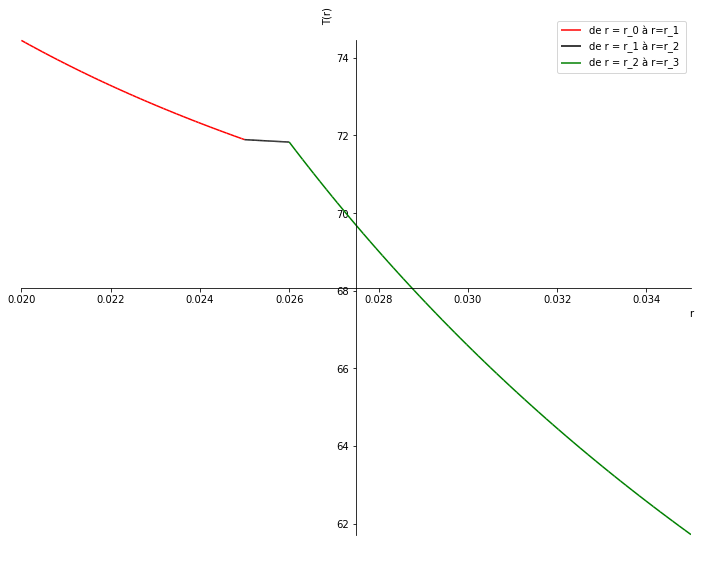

In [5]:
constantes=sp.solve((cl1,cl2,cl3,cl4,cl5,cl6),sp.symbols('C1 C2 C3 C4 C5 C6'))
T1=T1.subs(constantes)
T2=T2.subs(constantes)
T3=T3.subs(constantes)
dico={'k_1':4,'k_2':25,'k_3':1,
      'h_0':100,'h_3':20,'r_0':0.020,'r_1':0.025,'r_2':0.026,'r_3':0.035,'T_a':100,'T_b':20}
T1p=T1.subs(dico)
T2p=T2.subs(dico)
T3p=T3.subs(dico)
# Calcule les taux de chaleur en 0 et en 3 (doivent être égaux) (watts / mètre de longueur)
#
taux3=(h3*(T3-Tb)*2*sp.pi*r3).subs(dico)      # pour mettre les valeurs numériques dans
taux0=(h0*(Ta-T1)*2*sp.pi*r0).subs(dico)      # l'expression symbolique, on subs(dico)
#
#
print(taux3.subs(r,r3.subs(dico)), taux0.subs(r,r0.subs(dico))) 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
#plt.figure(figsize=(12,10))
p=sp.plot((T1p,(r,r0.subs(dico),r1.subs(dico)))
         ,(T2p,(r,r1.subs(dico),r2.subs(dico)))
         ,(T3p,(r,r2.subs(dico),r3.subs(dico)))
         ,legend=True,ylabel='T(r)',xlabel='r',show=False) #affiche pas tout de suite
p[0].line_color = 'red'
p[0].label='de r = r_0 à r=r_1 '
p[1].line_color = 'black'
p[1].label='de r = r_1 à r=r_2 '
p[2].line_color = 'green'
p[2].label='de r = r_2 à r=r_3 '
p.show()                         # maintenant on est prêts à afficher